In [15]:
import pandas as pd
from scipy.io import arff
import os
os.chdir('C:/Users/fauza/OneDrive/Documents/Job/Skill Test/Smartfren/')
print(os.getcwd())

file_path = 'data/Supply Chain Management_test.arff'
data, meta = arff.loadarff(file_path)
df = pd.DataFrame(data)

target_features = [col for col in df.columns if col.startswith("MTLp") or col == "LBL"]
non_target_features = [col for col in df.columns if not (col.startswith("MTLp") or col == "LBL")]

C:\Users\fauza\OneDrive\Documents\Job\Skill Test\Smartfren


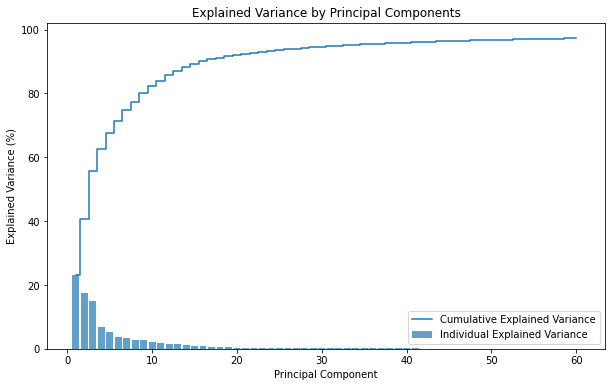

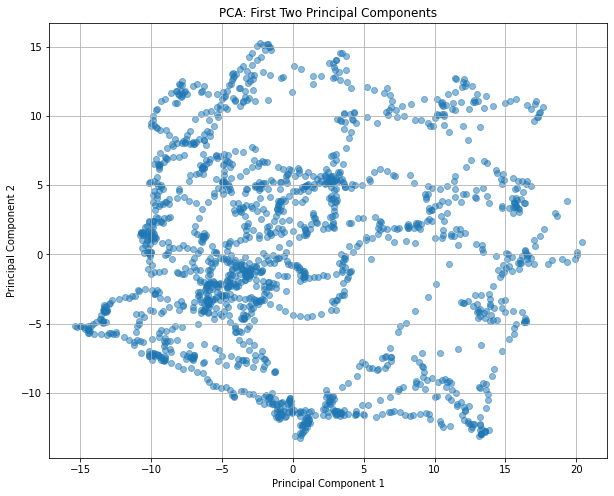

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt


# Standardize the non-target features
scaler = StandardScaler()
non_target_data = df[non_target_features]
scaled_data = scaler.fit_transform(non_target_data)

# Apply PCA
pca = PCA(n_components=60,random_state=19)
pca_result = pca.fit_transform(scaled_data)

# Variance explained by each principal component
explained_variance = pca.explained_variance_ratio_ * 100
cumulative_variance = np.cumsum(explained_variance)

# Visualize explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, label="Individual Explained Variance")
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where="mid", label="Cumulative Explained Variance")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance (%)")
plt.title("Explained Variance by Principal Components")
plt.legend(loc="best")
plt.show()

# Visualize the first two principal components
plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA: First Two Principal Components")
plt.grid(True)
plt.show()


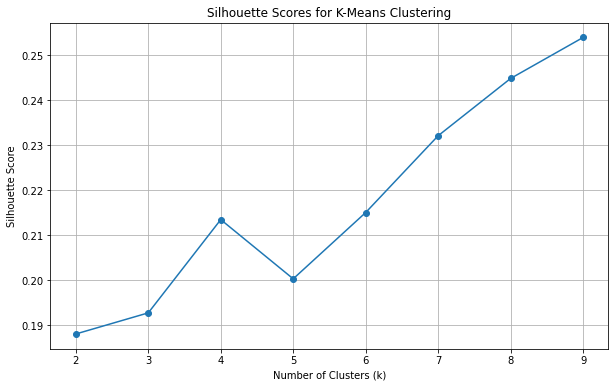

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Perform clustering on the PCA-transformed data using K-Means
num_clusters = range(2, 10)  # Test different numbers of clusters
silhouette_scores = []

for k in num_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(pca_result[:, :50])  # Use the top 50 PCs
    score = silhouette_score(pca_result[:, :50], cluster_labels)
    silhouette_scores.append(score)

# Plot silhouette scores to find the optimal number of clusters
plt.figure(figsize=(10, 6))
plt.plot(num_clusters, silhouette_scores, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for K-Means Clustering")
plt.grid(True)
plt.show()

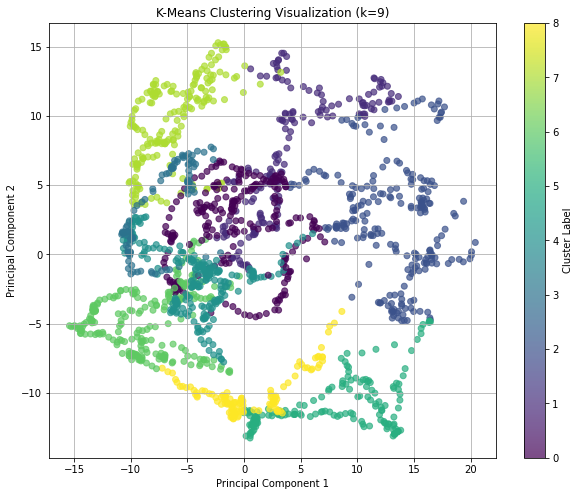

In [20]:
# Use the best number of clusters based on the silhouette score
optimal_k = num_clusters[silhouette_scores.index(max(silhouette_scores))]
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(pca_result[:, :50])

# Visualize clusters on the first two principal components
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label="Cluster Label")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title(f"K-Means Clustering Visualization (k={optimal_k})")
plt.grid(True)
plt.show()

In [14]:
loading_matrix  = pd.DataFrame(
    pca.components_,
    columns=non_target_data.columns,
    index=[f'PC{i+1}' for i in range(pca.n_components_)]
)


In [12]:
loading_matrix.abs().T.sort_values(by='PC1', ascending=False)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60
compidx8lt20l4,0.092920,0.063704,0.022994,0.058531,0.008216,0.014945,0.015665,0.030239,0.036523,0.055946,...,0.019602,0.012493,0.031332,0.027545,0.071382,0.066010,0.040457,0.031145,0.010339,0.029746
compidx8lt20l2,0.092736,0.064325,0.022019,0.058484,0.009852,0.015300,0.008221,0.037031,0.042493,0.055877,...,0.000612,0.020846,0.032729,0.000569,0.051794,0.031267,0.039209,0.020736,0.002965,0.029755
compidx8lt20l1,0.092407,0.064537,0.021399,0.058188,0.010621,0.015791,0.003716,0.040822,0.045360,0.055126,...,0.016080,0.023409,0.040543,0.028226,0.025706,0.013135,0.019416,0.003373,0.017519,0.025731
compidx8lt10l2,0.092367,0.064603,0.009080,0.073158,0.010501,0.013579,0.045789,0.000278,0.024889,0.058042,...,0.013240,0.033606,0.041604,0.037701,0.065689,0.012883,0.033147,0.002750,0.027968,0.045874
compidx8lt10l1,0.092266,0.064805,0.008679,0.073135,0.011157,0.014098,0.043566,0.002205,0.025935,0.058044,...,0.005394,0.035668,0.065347,0.076029,0.044865,0.028225,0.007271,0.029983,0.002671,0.051387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
compidx0lt20,0.002531,0.021035,0.135166,0.010512,0.013464,0.005288,0.097124,0.047294,0.004310,0.056027,...,0.002340,0.061669,0.039821,0.018139,0.037675,0.054030,0.046869,0.008726,0.055680,0.009686
compidx0lt20l1,0.002328,0.021232,0.136383,0.009877,0.012514,0.006824,0.091745,0.051268,0.009585,0.055546,...,0.027255,0.029175,0.021316,0.008502,0.011660,0.045324,0.056751,0.014387,0.022969,0.005066
compidx0lt20l2,0.002101,0.021366,0.137304,0.009271,0.011675,0.008208,0.085863,0.054609,0.014703,0.054619,...,0.053021,0.007478,0.005732,0.016082,0.011016,0.041751,0.054456,0.043737,0.027809,0.020114
compidx0lt20l8,0.002046,0.021858,0.138250,0.005688,0.007285,0.014357,0.048354,0.063756,0.035896,0.044576,...,0.072732,0.072077,0.046182,0.048002,0.031434,0.012809,0.019523,0.026058,0.085372,0.033415


In [11]:
dominant_features = loading_matrix.abs().T.sort_values(by='PC1', ascending=False).index
list(dominant_features)

['compidx8lt20l4',
 'compidx8lt20l2',
 'compidx8lt20l1',
 'compidx8lt10l2',
 'compidx8lt10l1',
 'compidx8lt10l4',
 'compidx8lt10',
 'compidx8lt20',
 'compidx8lt20l8',
 'compidx12lt2l2',
 'compidx12lt10l4',
 'compidx12lt2l4',
 'compidx12lt10l2',
 'compidx12lt20l4',
 'compidx8lt10l8',
 'compidx8lt6l2',
 'compidx12lt2l1',
 'compidx12lt2l8',
 'compidx8lt6l1',
 'compidx8lt6l4',
 'compidx12lt10l1',
 'compidx12lt20l2',
 'compidx8lt6',
 'compidx12lt6l4',
 'compidx12lt6l2',
 'compidx12lt2',
 'compidx8lt2l2',
 'compidx8lt2l1',
 'compidx12lt6l1',
 'compidx12lt10l8',
 'compidx8lt2l4',
 'compidx12lt20l1',
 'compidx8lt2',
 'compidx12lt6l8',
 'compidx12lt10',
 'compidx12lt20l8',
 'compidx8lt6l8',
 'compidx10lt20l4',
 'compidx12lt6',
 'compidx12lt20',
 'compidx8lt2l8',
 'compidx10lt10l4',
 'compidx10lt20l2',
 'compidx10lt10l2',
 'compidx10lt20l8',
 'compidx10lt10l8',
 'compidx10lt10l1',
 'compidx10lt20l1',
 'compidx10lt10',
 'compidx10lt20',
 'compidx10lt6l4',
 'compidx10lt6l8',
 'compidx8lt30l8',
 'c

In [10]:
len(list(dominant_features))

280